In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Linear Regression

Linear Regression is a fundamental algorithm in machine learning

It is used as a building block for other ML models

LR is easy to understand, calculate, and interpret

LR is fast!

Often good enough. Don't over-engineer your solution. If your data is linear then use a linear model.

What is linear data?

In [13]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=20, n_features=1, random_state=0, noise=4, bias=100.0)

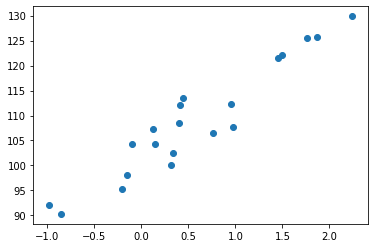

In [14]:
plt.scatter(X, y)

The response or output is directly proportional to the input

We can see from the data that we have a linear trend in our model. (The response or output is directly proportional to the input)

We can use Linear Regression to fit a line through the data.

![lr](../Images/linear_regression.jpg)

Using a trained model allows us to make predictions of the output value (Home Selling Price) given a new input (Number of Bathrooms).

![pre-prices1](../Images/predict_prices_1.png)

New House on the Market
![pre-prices2](../Images/predict_prices_2.png)

We can use our linear model to predict the price of that house
![pre-prices3](../Images/predict_prices_3.png)

What about non-linear data?

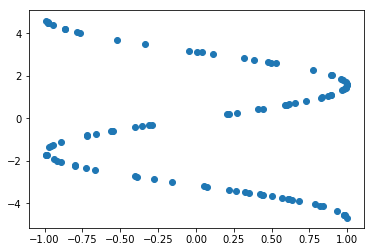

In [4]:
from sklearn.datasets import make_s_curve

# generate an s-curve with 100 points and a fixed random seed
data, color = make_s_curve(100, random_state=0)
plt.scatter(data[:,0], color)  # first column of data, results

![happy](../Images/happy.gif)

## Linear Regression 

A regression line is simply calculating a line that best fits the data. This is typically done through the least squares method where the line is chosen to have the smallest overall distance to the points.

$y = \theta_0 + \theta_1 x$

* $y$ is the output response
* $x$ is the input feature
* $\theta_0$ is the y-axis intercept
* $\theta_1$ is weight coefficient (slope)

Source: [Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression)

## Sklearn

The Sklearn library provides us with a Linear Regression model that will fit a line to our data. Sklearn follows a consistent API where you define a model object, fit the model to the data, and then make predictions with the model.
![sklearn](../Images/sklearn_api.png)

First, we create the model using the Sklearn LinearRegression model.

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

Next, we fit the model to our data using the fit method. 

In [15]:
model.fit(X, y)
print(model)

LinearRegression()


We can view the coefficients and intercept of the line from the `coef_` and `intercept_` attributes. Note that the `_` suffix indicates that the attribute is available after model is fit to the data (trained).

In [16]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [12.44002424]
y-axis intercept:  101.89622505659258


Our linear model now looks like this: 

$y = 101.896225057 + 12.44002424 x$


We can use our model to make predictions.

In [17]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: 98.01970393090812
Predicted output: 100.01333771669648
Prediction Error: 1.9936337857883615


In [18]:
pd.DataFrame({"Predicted": predictions, "Actual": y, "Error": predictions - y})[["Predicted", "Actual", "Error"]]

,Predicted,Actual,Error
0,100.013338,98.019704,1.993634
1,106.874190,108.458654,-1.584464
2,114.071749,107.776544,6.295205
3,91.271253,90.315201,0.956053
4,89.738865,92.047965,-2.309101
5,105.790795,100.144726,5.646069
6,100.612180,104.371286,-3.759106
7,99.344051,95.208967,4.135085
8,106.047142,102.505262,3.541880
9,120.482605,122.119661,-1.637056


We can calculate the output response for the minimum and maximum input values. Note: This is useful later when we want to plot the fit line.

In [19]:
x_min = X.min()
x_max = X.max()

In [20]:
y_min_actual = y.min()
y_max_actual = y.max()

In [21]:
y_min = 101.896225057 + 12.44002424 * x_min
y_max = 101.896225057 + 12.44002424 * x_max
print(f"Actual Min Value: {y_min_actual}")
print(f"Calculated Min Value: {y_min}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Calculated Max Value: {y_max}")

Actual Min Value: 90.31520078064568
Calculated Min Value: 89.73886454212163
Actual Max Value: 129.85715020208258
Calculated Max Value: 129.7729907743173


We can also use the predict function to calculate predicted values

In [22]:
y_min_predicted = model.predict([[x_min]])
y_max_predicted = model.predict([[x_max]])
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")

Actual Min Value: 90.31520078064568
Predicted Min Value: [89.73886454]
Actual Max Value: 129.85715020208258
Predicted Max Value: [129.77299077]


We can show the model fit by plotting the predicted values against the original data

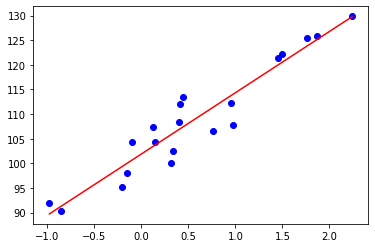

In [23]:
plt.scatter(X, y, c='blue')
plt.plot([x_min, x_max], [y_min, y_max], c='red')

## Your Turn!